## Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

## Global Settings

In [2]:
sns.set_theme(style="darkgrid")
A4_DIMS = (11.7, 8.27)

## Utility functions

In [3]:
def countplot(data, column, hue=None, log=False):
    top_n = data[column].value_counts().iloc[:20].index
    top = data[data[column].isin(top_n)]

    fig, ax = pyplot.subplots(figsize=A4_DIMS)
    ax.tick_params(labelrotation=90)
    if log: ax.set(yscale="log")
    sns.countplot(ax=ax, x=column, data=top, order=top[column].value_counts().index, hue=hue)

## Load dataset

In [4]:
transactions = pd.read_csv("../data/transactions_train.csv")
transactions.head()

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


## EDA

### Transaction type counts

CASH_OUT    2233369
PAYMENT     2147832
CASH_IN     1396865
TRANSFER     531817
DEBIT         41310
Name: type, dtype: int64

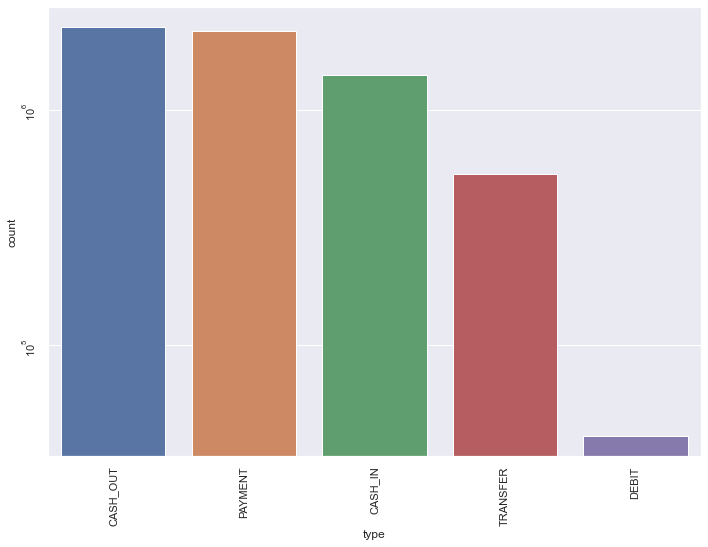

In [5]:
countplot(transactions, "type", log=True)
transactions["type"].value_counts()

### Transaction type counts (by Label)

CASH_OUT    3868
TRANSFER    3849
Name: type, dtype: int64

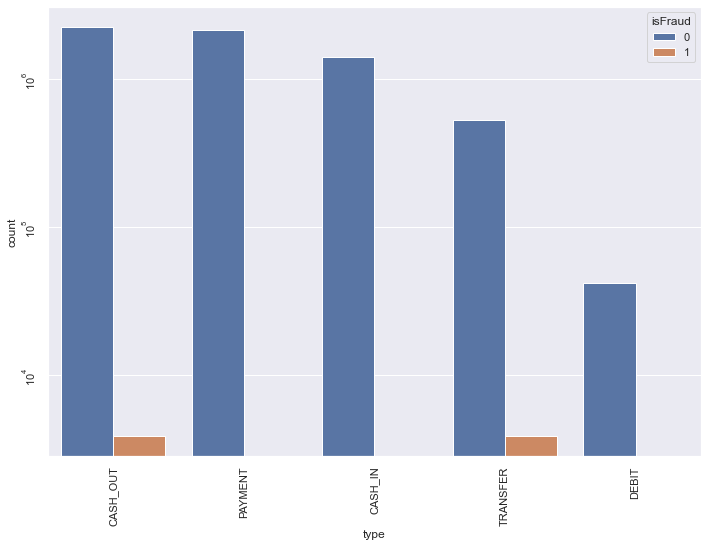

In [6]:
countplot(transactions, "type", hue="isFraud", log=True)
transactions[transactions["isFraud"] == 1]["type"].value_counts()

### Transaction type counts (Non-fraud only)

CASH_OUT    2229501
PAYMENT     2147832
CASH_IN     1396865
TRANSFER     527968
DEBIT         41310
Name: type, dtype: int64

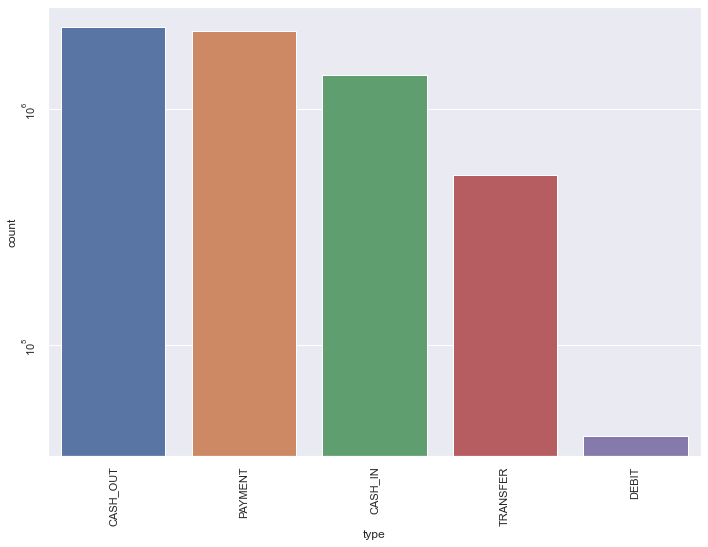

In [7]:
countplot(transactions[transactions["isFraud"] == 0], "type", log=True)
transactions[transactions["isFraud"] == 0]["type"].value_counts()

### Transaction type counts (Fraud only)

CASH_OUT    3868
TRANSFER    3849
Name: type, dtype: int64

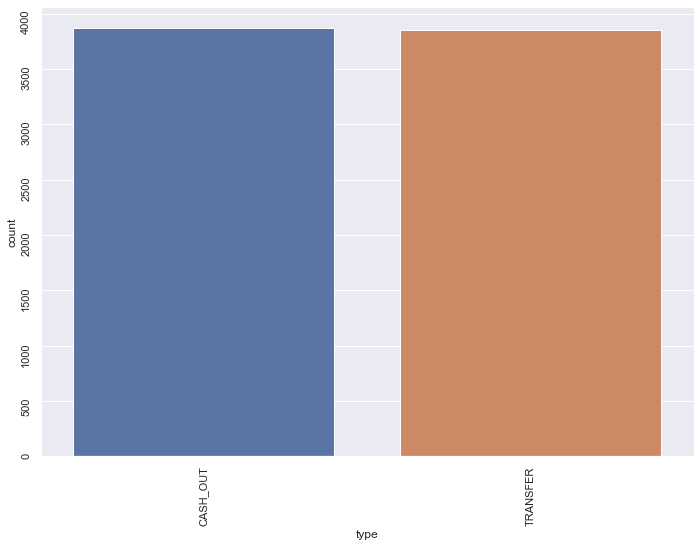

In [8]:
countplot(transactions[transactions["isFraud"] == 1], "type")
transactions[transactions["isFraud"] == 1]["type"].value_counts()

### Transaction label counts

0    6343476
1       7717
Name: isFraud, dtype: int64

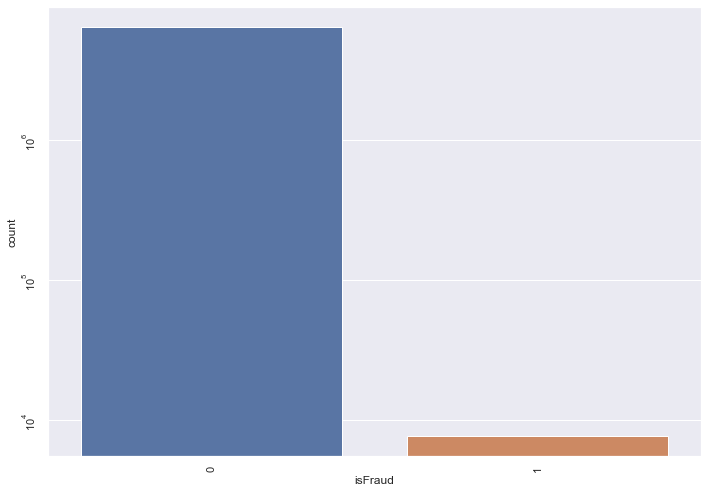

In [9]:
countplot(transactions, "isFraud", log=True)
transactions["isFraud"].value_counts()

### Median amounts per transaction type

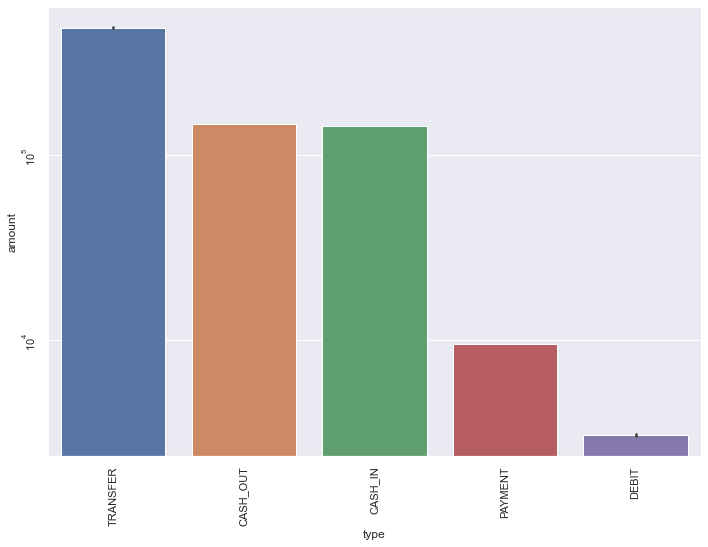

In [10]:
top_n = transactions.groupby("type").aggregate(func=np.median).sort_values(by="amount", ascending=False)
amount_type_df = transactions[["type", "amount"]]

fig, ax = pyplot.subplots(figsize=A4_DIMS)
ax.tick_params(labelrotation=90)
ax.set(yscale="log")
ax = sns.barplot(x="type", y="amount", data=amount_type_df, estimator=np.median, order=top_n.index)

### Median amounts per transaction types (Non-fraud only)

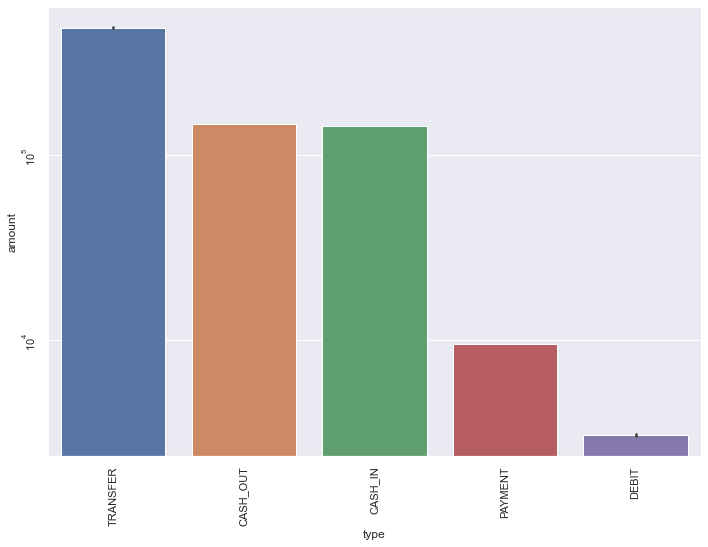

In [11]:
top_n = transactions.groupby("type").aggregate(func=np.median).sort_values(by="amount", ascending=False)
amount_type_df = transactions[transactions["isFraud"] == 0][["type", "amount"]]

fig, ax = pyplot.subplots(figsize=A4_DIMS)
ax.tick_params(labelrotation=90)
ax.set(yscale="log")
ax = sns.barplot(x="type", y="amount", data=amount_type_df, estimator=np.median, order=top_n.index)

### Median amounts per transaction types (Fraud only)

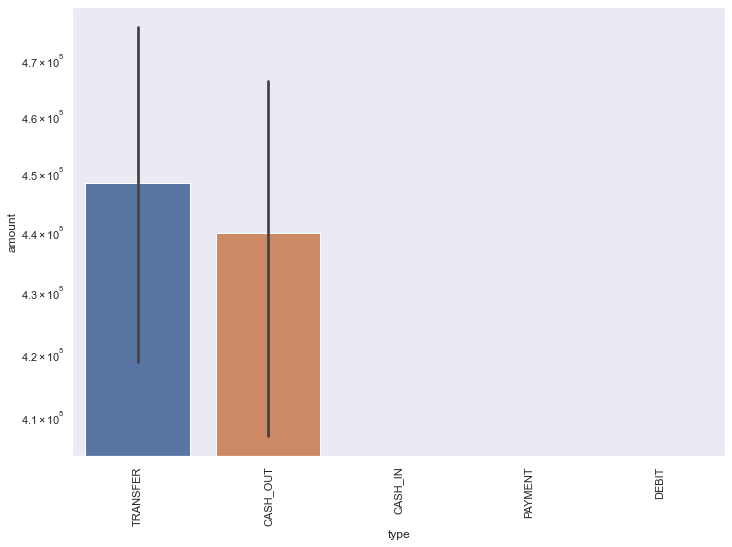

In [12]:
top_n = transactions.groupby("type").aggregate(func=np.median).sort_values(by="amount", ascending=False)
amount_type_df = transactions[transactions["isFraud"] == 1][["type", "amount"]]

fig, ax = pyplot.subplots(figsize=A4_DIMS)
ax.tick_params(labelrotation=90)
ax.set(yscale="log")
ax = sns.barplot(x="type", y="amount", data=amount_type_df, estimator=np.median, order=top_n.index)

### Mean amounts per transaction types (Fraud only)

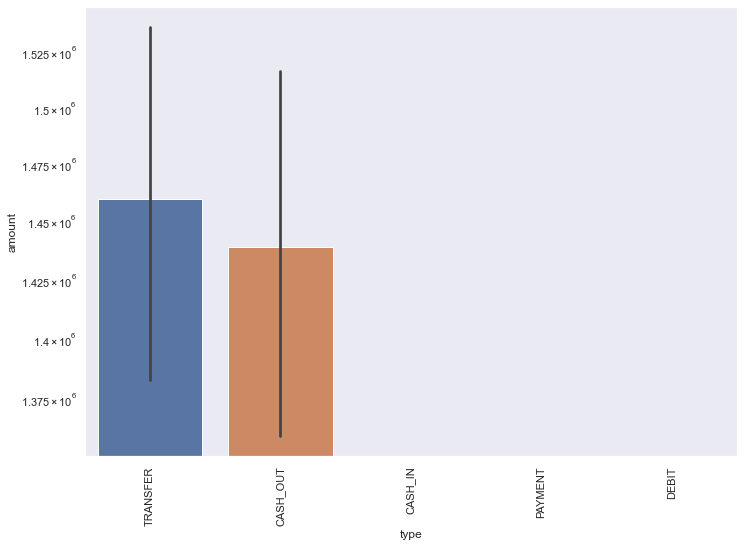

In [13]:
top_n = transactions.groupby("type").aggregate(func=np.mean).sort_values(by="amount", ascending=False)
amount_type_df = transactions[transactions["isFraud"] == 1][["type", "amount"]]

fig, ax = pyplot.subplots(figsize=A4_DIMS)
ax.tick_params(labelrotation=90)
ax.set(yscale="log")
ax = sns.barplot(x="type", y="amount", data=amount_type_df, estimator=np.mean, order=top_n.index)

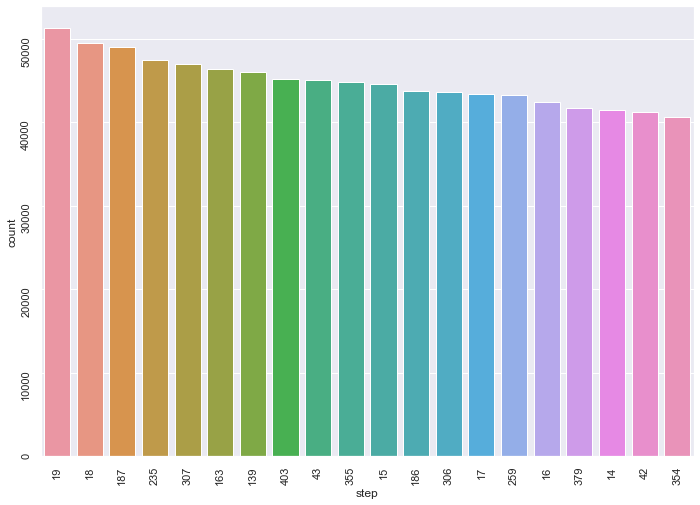

In [14]:
countplot(transactions, "step")

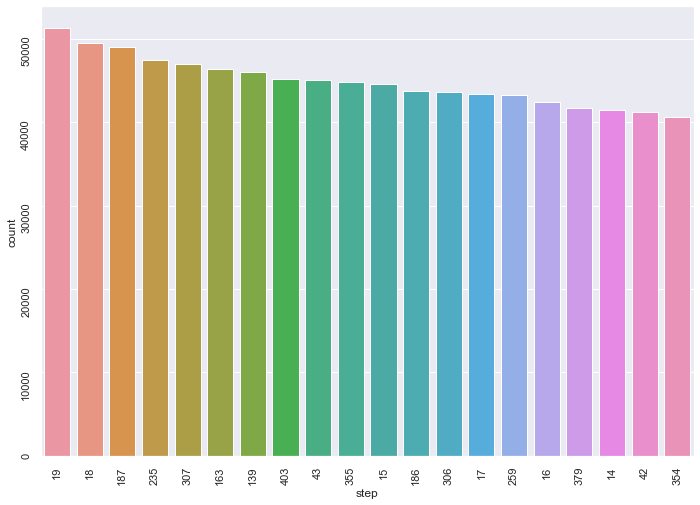

In [15]:
countplot(transactions[transactions["isFraud"] == 0], "step")

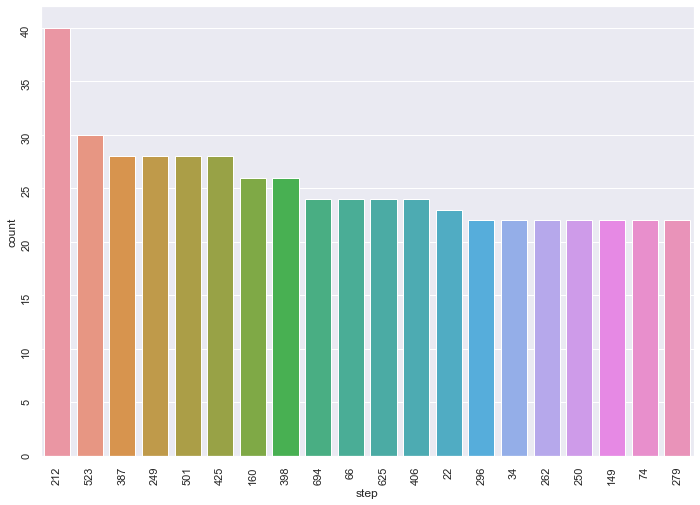

In [16]:
countplot(transactions[transactions["isFraud"] == 1], "step")

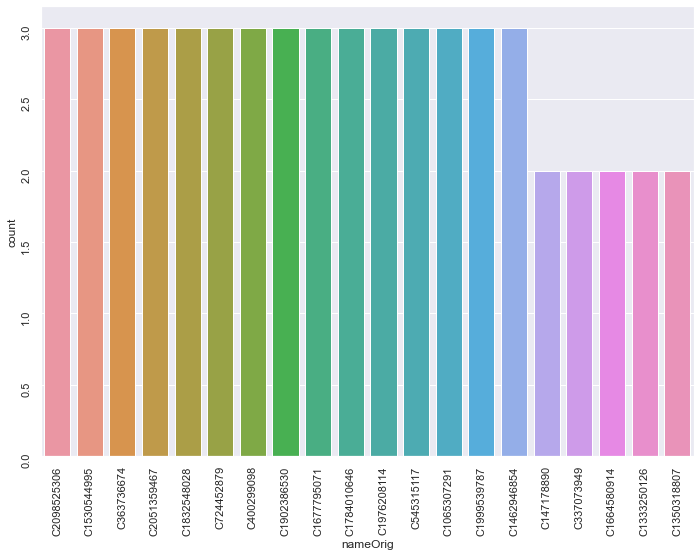

In [17]:
countplot(transactions[transactions["isFraud"] == 0], "nameOrig")

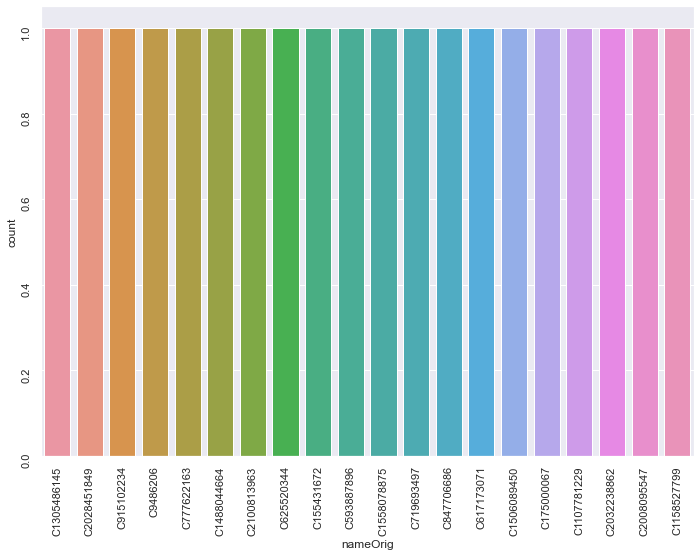

In [18]:
countplot(transactions[transactions["isFraud"] == 1], "nameOrig")
# Accounts with fraud transactions only transacted once

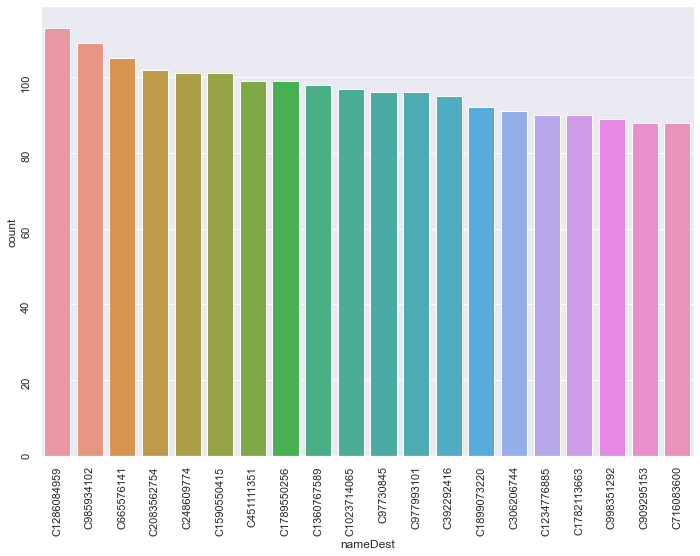

In [19]:
countplot(transactions[transactions["isFraud"] == 0], "nameDest")

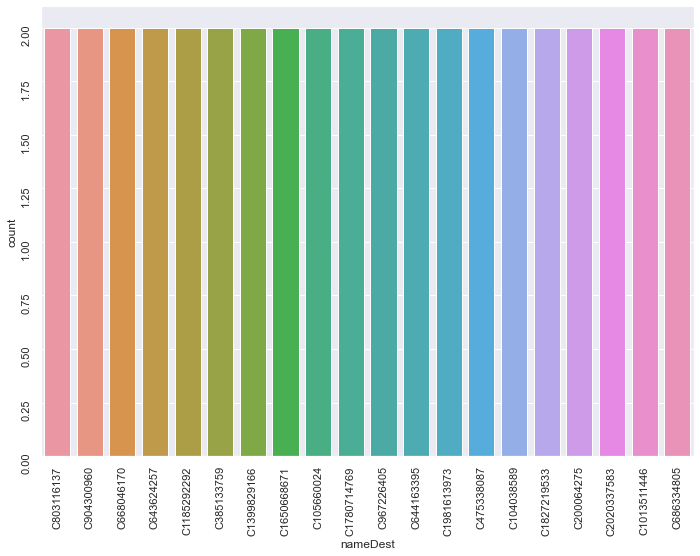

In [20]:
countplot(transactions[transactions["isFraud"] == 1], "nameDest")